In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [18]:
# --- Scraping tsa data ---
url = "https://www.eia.gov/dnav/pet/hist/leafhandler.ashx?f=m&n=pet&s=emm_epm0_pte_nus_dpg"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
df = pd.read_html(str(table))[0]

C:\Users\jstew\AppData\Local\Temp\ipykernel_24128\1588065648.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [20]:
# --- use xlrd openxl to convert xls files to csv for gas prices ---
xls_file = r"C:\Users\jstew\DE_projects\TSA-labor-day\Unemployment-rates.xlsx"
df = pd.read_excel(xls_file, sheet_name='Data 1', skiprows=1)

C:\Users\jstew\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


ValueError: Worksheet named 'Data 1' not found

In [21]:
# --- viewing xls first 5 rows ---
df.head()

,0
0,View History: Weekly Monthly Annual Download D...
1,U.S. All Grades All Formulations Retail Gasoli...


In [318]:
# convert df to csv file
df.to_csv('gas-prices-weekly.csv', index=False)

In [443]:
# --- use xlrd openxl to convert xls files to csv for unemployment rates ---
xls_file = "C:/Users/jstew/DE_projects/TSA-labor-day/Unemployment-rates.xlsx"
xls = pd.ExcelFile(xls_file)
print(xls.sheet_names)

df = pd.read_excel(xls_file, sheet_name='BLS Data Series', skiprows=11)
df.head()

['BLS Data Series']


C:\Users\jstew\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
1,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
2,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
3,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
4,2019,4.0,3.8,3.8,3.7,3.6,3.6,3.7,3.6,3.5,3.6,3.6,3.6


In [444]:
# save unemployment-rates as a csv
df.to_csv('unemployment-rates.csv', index=False)

In [445]:
df_unemployment = df

In [447]:
df_unemployment.dtypes

Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object

In [448]:
# Melt wide table (Jan, Feb, ...) into long format
df_unemp_long = df_unemployment.melt(
    id_vars=['Year'],
    value_vars=['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec'],
    var_name='Month',
    value_name='UnemploymentRate'
)

# Map month abbreviations to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df_unemp_long['MonthNum'] = df_unemp_long['Month'].map(month_map)

# Create a datetime column (set to first of each month)
df_unemp_long['month_date'] = pd.to_datetime(
    df_unemp_long['Year'].astype(str) + '-' + df_unemp_long['MonthNum'].astype(str) + '-01'
)

# Final unemployment dataframe
unemployment = df_unemp_long[['month_date', 'UnemploymentRate']]

In [450]:
unemployment.dtypes

month_date          datetime64[ns]
UnemploymentRate           float64
dtype: object

In [394]:
# use xlrd openxl to convert xls files to csv for quarterly airfare pricing
xls_file = "C:/Users/jstew/DE_projects/TSA-labor-day/quarterly-airfare-rates.xlsx"
xls = pd.ExcelFile(xls_file)
print(xls.sheet_names)

df = pd.read_excel(xls_file, sheet_name='Fares', skiprows=0)
df.head()

['Fares']


,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,1,296.895553,627.476878
1,1995,2,296.462724,621.073174
2,1995,3,287.514840,599.701035
3,1995,4,287.776292,597.380616
4,1996,1,283.969692,584.154358


In [400]:
# round airfare pricing to the nearest cent
df = df.round(2)
print(df)

     Year  Quarter  U.S. Average (Current $)   \
0    1995        1                     296.90   
1    1995        2                     296.46   
2    1995        3                     287.51   
3    1995        4                     287.78   
4    1996        1                     283.97   
..    ...      ...                        ...   
116  2024        1                     387.95   
117  2024        2                     382.27   
118  2024        3                     365.65   
119  2024        4                     397.67   
120  2025        1                     397.16   

     U.S. Average (Inflation-Adjusted $)   
0                                  627.48  
1                                  621.07  
2                                  599.70  
3                                  597.38  
4                                  584.15  
..                                    ...  
116                                398.57  
117                                388.26  
118            

In [408]:
airfare_df = pd.read_csv('quarterly-airfare-rates.csv', skiprows=0)

In [410]:
print(airfare_df.columns)

Index(['Year', 'Quarter', 'U.S. Average (Current $) ',
       'U.S. Average (Inflation-Adjusted $) '],
      dtype='object')


In [411]:
# Rename columns to remove spaces and simplify
airfare_df = airfare_df.rename(columns={
    'Year': 'year',
    'Quarter': 'quarter',
    'U.S. Average (Current $) ': 'avg_current',
    'U.S. Average (Inflation-Adjusted $) ': 'avg_inflation'
})

In [412]:
# Now you can create a datetime from year and quarter
airfare_df['quarter_date'] = pd.to_datetime(
    airfare_df['year'].astype(str) + 'Q' + airfare_df['quarter'].astype(str)
)

C:\Users\jstew\AppData\Local\Temp\ipykernel_5832\2858479198.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [413]:
quarter_to_month = {'1': '01', '2': '04', '3': '07', '4': '10'}

In [427]:
# Create a proper datetime from year + quarter
airfare_df['quarter_date'] = pd.to_datetime(
    airfare_df['year'].astype(str) + '-' +
    airfare_df['quarter'].astype(str).map(quarter_to_month) + '-01'
)

KeyError: 'quarter'

In [428]:
print(airfare_df)

     year  avg_inflation quarter_date
0    1995         627.48   1995-01-01
1    1995         621.07   1995-04-01
2    1995         599.70   1995-07-01
3    1995         597.38   1995-10-01
4    1996         584.15   1996-01-01
..    ...            ...          ...
116  2024         398.57   2024-01-01
117  2024         388.26   2024-04-01
118  2024         370.27   2024-07-01
119  2024         401.78   2024-10-01
120  2025         397.16   2025-01-01

[121 rows x 3 columns]


In [431]:
print(airfare_df)

     year  avg_inflation quarter_date
0    1995         627.48   1995-01-01
1    1995         621.07   1995-04-01
2    1995         599.70   1995-07-01
3    1995         597.38   1995-10-01
4    1996         584.15   1996-01-01
..    ...            ...          ...
116  2024         398.57   2024-01-01
117  2024         388.26   2024-04-01
118  2024         370.27   2024-07-01
119  2024         401.78   2024-10-01
120  2025         397.16   2025-01-01

[121 rows x 3 columns]


In [551]:
# convert airfare df to csv file
df.to_csv('quarterly-airfare-rates.csv', index=False)

In [552]:
airfare_df.dtypes

year                      int64
avg_inflation           float64
quarter_date     datetime64[ns]
dtype: object

In [436]:
airfare_df = airfare_df.sort_values('quarter_date')

In [381]:
# --- using glob to combine all tsa csv files to one large file for all years ---
import pandas as pd
import glob

files = glob.glob("tsa_data_*.csv")
print("Merging these files:", files)

tsa_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
tsa_df.to_csv("tsa_data_all_years.csv", index=False)

Merging these files: ['tsa_data_2019.csv', 'tsa_data_2020.csv', 'tsa_data_2021.csv', 'tsa_data_2022.csv', 'tsa_data_2023.csv', 'tsa_data_2024.csv', 'tsa_data_2025.csv']


In [382]:
# viewing first 5 rows of tsa new csv file
tsa_df.head()

,date,numbers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [390]:
df = pd.read_csv('tsa_data_all_years.csv')
df.head()

,date,numbers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [ ]:
# using to_datetime to change type to datetime for tsa csv
tsa['date'] = pd.to_datetime(tsa['date'])

# Rename columns
gas = pd.read_csv('gas-prices-weekly.csv', skiprows=1)

In [ ]:
# changing gas csv column names for better reading
gas.columns = ['week_start', 'price']

# using to_datetime to change type to datetime for gas csv
gas['week_start'] = pd.to_datetime(gas['week_start'])

In [435]:
# viewing first five rows of gas csv
gas.head()

,week_start,price
0,1993-04-05,1.068
1,1993-04-12,1.079
2,1993-04-19,1.079
3,1993-04-26,1.086
4,1993-05-03,1.086


In [ ]:
# saving update gas csv
gas.to_csv('gas-prices-weekly.csv', index=False)

In [ ]:
# viewing tsa and gas data types
tsa.dtypes
gas.dtypes

In [ ]:
# sorting gas and tsa by date chronologically
gas = gas.sort_values('week_start')
tsa = tsa.sort_values('date')

In [451]:
# merge tsa and gas csv to one csv
tsa_gas_merged = pd.merge_asof(
    tsa,                # daily TSA data
    gas,                # weekly gas data
    left_on='date',     # TSA daily date
    right_on='week_start'  # weekly gas week start
)

In [454]:
# Merge unemployment (monthly)
tsa_gas_unemp_merged = pd.merge_asof(
    tsa_gas_merged.sort_values('date'),
    unemployment.sort_values('month_date'),
    left_on='date',
    right_on='month_date'
)

In [455]:
# Merge airfare (quarterly)
final_merged = pd.merge_asof(
    tsa_gas_unemp_merged.sort_values('date'),
    airfare_df.sort_values('quarter_date'),
    left_on='date',
    right_on='quarter_date'
)

In [456]:
print(final_merged)

           date  numbers week_start  price month_date  UnemploymentRate  year  \
0    2019-01-01  2201765 2018-12-31  2.358 2019-01-01               4.0  2019   
1    2019-01-02  2424225 2018-12-31  2.358 2019-01-01               4.0  2019   
2    2019-01-03  2279384 2018-12-31  2.358 2019-01-01               4.0  2019   
3    2019-01-04  2230078 2018-12-31  2.358 2019-01-01               4.0  2019   
4    2019-01-05  2049460 2018-12-31  2.358 2019-01-01               4.0  2019   
...         ...      ...        ...    ...        ...               ...   ...   
2413 2025-08-10  2960349 2025-08-04  3.265 2025-08-01               NaN  2025   
2414 2025-08-11  2763671 2025-08-11  3.243 2025-08-01               NaN  2025   
2415 2025-08-12  2256082 2025-08-11  3.243 2025-08-01               NaN  2025   
2416 2025-08-13  2331215 2025-08-11  3.243 2025-08-01               NaN  2025   
2417 2025-08-14  2832747 2025-08-11  3.243 2025-08-01               NaN  2025   

      avg_inflation quarter

In [460]:
final_merged['UnemploymentRate'] = final_merged['UnemploymentRate'].ffill()

In [462]:
# dropping year column
final_merged = final_merged.drop(columns=['year'])
final_merged.head()

,date,numbers,week_start,price,month_date,UnemploymentRate,avg_inflation,quarter_date
0,2019-01-01,2201765,2018-12-31,2.358,2019-01-01,4.0,441.43,2019-01-01
1,2019-01-02,2424225,2018-12-31,2.358,2019-01-01,4.0,441.43,2019-01-01
2,2019-01-03,2279384,2018-12-31,2.358,2019-01-01,4.0,441.43,2019-01-01
3,2019-01-04,2230078,2018-12-31,2.358,2019-01-01,4.0,441.43,2019-01-01
4,2019-01-05,2049460,2018-12-31,2.358,2019-01-01,4.0,441.43,2019-01-01


In [463]:
# dropping month_date column
final_merged = final_merged.drop(columns=['month_date'])
final_merged.head()

,date,numbers,week_start,price,UnemploymentRate,avg_inflation,quarter_date
0,2019-01-01,2201765,2018-12-31,2.358,4.0,441.43,2019-01-01
1,2019-01-02,2424225,2018-12-31,2.358,4.0,441.43,2019-01-01
2,2019-01-03,2279384,2018-12-31,2.358,4.0,441.43,2019-01-01
3,2019-01-04,2230078,2018-12-31,2.358,4.0,441.43,2019-01-01
4,2019-01-05,2049460,2018-12-31,2.358,4.0,441.43,2019-01-01


In [ ]:
# renamed columns from numbers to passengers
final_merged = final_merged.rename(columns={'numbers': 'passengers'})
final_merged = final_merged.drop(columns=['week_start'])

final_merged = final_merged.rename(columns={'Gas price': 'GasPrice'})

final_merged = final_merged.rename(columns={'passengers': 'Passengers'})

final_merged = final_merged.rename(columns={'date': 'Date'})`

final_merged = final_merged.rename(columns={'avg_inflation': 'AverageFarePrice'})

final_merged = final_merged.drop(columns=['quarter_date'])

In [486]:
# --- saved final_merged to csv ---
final_merged.to_csv("final_merged.csv", index=False)

In [ ]:
# save tsa gas merged csv
tsa_gas_merged.to_csv('tsa_gas_merged.csv', index=False)

In [252]:
# merge airfare and gas/tsa csvs to one csv
tsa_gas_merged = pd.merge_asof(
    tsa,                # daily TSA data
    gas,                # weekly gas data
    left_on='date',     # TSA daily date
    right_on='week_start'  # weekly gas week start
)

In [ ]:
# Merge TSA+gas with monthly unemployment
tsa_gas_unemp = pd.merge_asof(
    tsa_gas_merged.sort_values('date'),
    unemployment.sort_values('month_date'),   # make sure you created a datetime col for year+month
    left_on='date',
    right_on='month_date'
)

            Date  Passengers  GasPrice  UnemploymentRate  AverageFarePrice
0     2019-01-01     2201765         2                 4               441
1     2019-01-02     2424225         2                 4               441
2     2019-01-03     2279384         2                 4               441
3     2019-01-04     2230078         2                 4               441
4     2019-01-05     2049460         2                 4               441
...          ...         ...       ...               ...               ...
2413  2025-08-10     2960349         3                 4               397
2414  2025-08-11     2763671         3                 4               397
2415  2025-08-12     2256082         3                 4               397
2416  2025-08-13     2331215         3                 4               397
2417  2025-08-14     2832747         3                 4               397

[2418 rows x 5 columns]


In [594]:
!pip install pandasql

In [597]:
# --- viewing final csv in sql and adding Labor Day weekend holiday ---

import pandas as pd
import pandasql as ps
import holidays

df = pd.read_csv("final_merged.csv", parse_dates=["Date"])

us_holidays = holidays.US(years=range(df['Date'].dt.year.min(), df['Date'].dt.year.max()+1))

labor_days = [d for d, name in us_holidays.items() if name == "Labor Day"]

labor_day_weekends = []
for day in labor_days:
    for offset in range(-3, 1):  # Fri (-3), Sat (-2), Sun (-1), Mon (0)
        labor_day_weekends.append(day + pd.Timedelta(days=offset))

df['LaborDayWeekend'] = df['Date'].isin(labor_day_weekends)

df.to_csv("C:/Users/jstew/DE_projects/TSA-labor-day/tsa-labordayweekend.csv", index=False)

C:\Users\jstew\AppData\Local\Temp\ipykernel_5832\2852063351.py:18: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [2]:
import pandas as pd
import pandasql as ps
import holidays
df = pd.read_csv("tsa-labordayweekend.csv")

df["Date"] = pd.to_datetime(df["Date"])

filtered_df = df[df['Date'] >= '2022-01-01']
print(filtered_df)
filtered_df.to_csv("C:/Users/jstew/DE_projects/TSA-labor-day/tsa-2022-2025.csv", index=False)

           Date  Passengers  GasPrice  UnemploymentRate  AverageFarePrice  \
1096 2022-01-01     1616850     3.375               4.0            368.64   
1097 2022-01-02     2026176     3.375               4.0            368.64   
1098 2022-01-03     1921966     3.381               4.0            368.64   
1099 2022-01-04     1673499     3.381               4.0            368.64   
1100 2022-01-05     1501170     3.381               4.0            368.64   
...         ...         ...       ...               ...               ...   
2413 2025-08-10     2960349     3.265               4.2            397.16   
2414 2025-08-11     2763671     3.243               4.2            397.16   
2415 2025-08-12     2256082     3.243               4.2            397.16   
2416 2025-08-13     2331215     3.243               4.2            397.16   
2417 2025-08-14     2832747     3.243               4.2            397.16   

      LaborDayWeekend  
1096            False  
1097            False  
109

In [7]:
# prophet for forecasting
!pip install prophet

In [71]:
from prophet import Prophet

In [1]:
from prophet import Prophet
df = pd.read_csv('C:/Users/jstew/DE_projects/TSA-labor-day/tsa-2022-2025.csv')

df = df[['Date','Passengers','GasPrice','UnemploymentRate','AverageFarePrice']].rename(
    columns={'Date':'ds','Passengers':'y'}
)

# Define Labor Day holiday effect
labor_days = pd.DataFrame({
    'holiday': 'labor_day',
    'ds': pd.to_datetime([
        '2022-09-05','2023-09-04','2024-09-02','2025-09-01'
    ]),
    'lower_window': -3,
    'upper_window': 3
})

# Build model
m = Prophet(
    holidays=labor_days,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.5
)

# If you don’t have good future projections for regressors, skip them:
# m.add_regressor('GasPrice')
# m.add_regressor('UnemploymentRate')
# m.add_regressor('AverageFarePrice')

m.fit(df)

# Future dataframe
future = m.make_future_dataframe(periods=20)

# Forecast
forecast = m.predict(future)

# Show last 20 days
forecast_tail = forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)
pd.set_option('display.float_format', '{:,.0f}'.format)
print(forecast_tail)


07:59:28 - cmdstanpy - INFO - Chain [1] start processing
07:59:29 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
1322 2025-08-15 2,781,869   2,617,127   2,951,772
1323 2025-08-16 2,409,597   2,243,363   2,574,907
1324 2025-08-17 2,776,814   2,617,906   2,942,886
1325 2025-08-18 2,675,844   2,512,361   2,833,397
1326 2025-08-19 2,312,713   2,157,527   2,476,455
1327 2025-08-20 2,418,639   2,260,726   2,583,435
1328 2025-08-21 2,701,986   2,539,389   2,877,776
1329 2025-08-22 2,739,267   2,568,984   2,894,772
1330 2025-08-23 2,363,094   2,200,145   2,528,923
1331 2025-08-24 2,722,185   2,565,208   2,884,975
1332 2025-08-25 2,609,418   2,440,833   2,767,427
1333 2025-08-26 2,231,819   2,071,938   2,394,634
1334 2025-08-27 2,321,971   2,149,648   2,498,617
1335 2025-08-28 2,589,841   2,429,851   2,743,549
1336 2025-08-29 2,960,810   2,793,258   3,124,046
1337 2025-08-30 2,293,520   2,137,667   2,446,605
1338 2025-08-31 2,324,293   2,172,242   2,505,302
1339 2025-09-01 2,820,777   2,660,709   2,988,888
1340 2025-09-02 2,409,056   2,256,342   2,585,832


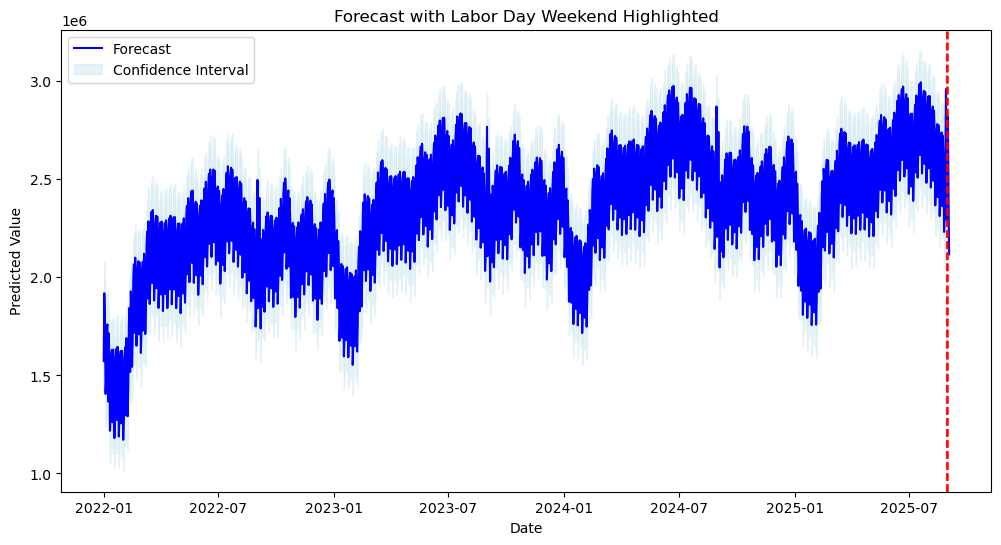

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

forecast['ds'] = pd.to_datetime(forecast['ds'])

plt.figure(figsize=(12,6))

# Plot the forecast line
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')

# Plot the highs and lows
plt.fill_between(forecast['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='lightblue', alpha=0.3, label='Confidence Interval')

labor_day_weekend = pd.to_datetime(['2025-08-30', '2025-08-31', '2025-09-01'])
for date in labor_day_weekend:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Forecast with Labor Day Weekend Highlighted')
plt.legend()
plt.show()

import pandas as pd

df_existing = pd.read_csv("tsa-2022-2025.csv")

forecast_to_save = forecast[['ds','yhat','yhat_lower','yhat_upper']].copy()
forecast_to_save.rename(columns={'ds':'Date'}, inplace=True)

df_existing['Date'] = pd.to_datetime(df_existing['Date'])
forecast_to_save['Date'] = pd.to_datetime(forecast_to_save['Date'])

df_combined = pd.concat([df_existing, forecast_to_save], ignore_index=True)

df_combined.to_csv("tsa-labordayweekend_with_forecast.csv", index=False)



In [5]:
# Load your existing CSV
df_existing = pd.read_csv("tsa-2022-2025.csv")

# Make sure 'ds' in forecast matches the column name in your CSV (e.g., 'Date')
forecast_to_save = forecast[['ds','yhat','yhat_lower','yhat_upper']].copy()
forecast_to_save.rename(columns={'ds':'Date'}, inplace=True)

# Optional: if 'Date' in existing CSV is not datetime
df_existing['Date'] = pd.to_datetime(df_existing['Date'])
forecast_to_save['Date'] = pd.to_datetime(forecast_to_save['Date'])

# Append the forecast to existing data
df_combined = pd.concat([df_existing, forecast_to_save], ignore_index=True)

# Save as a new CSV
df_combined.to_csv("tsa-labordayweekend_with_forecast.csv", index=False)
